# Employee Attrition Prediction and Analysis.

###### This project is based on the employee dataset to find out the attrition of the employee 
The data is collected from kaggle [https://www.kaggle.com/datasets/patelprashant/employee-attrition]. The objective of this project is to predict employee attrition using a dataset obtained from Kaggle. This dataset contains various attributes such as age, education level, job role, salary, and satisfaction scores, with the attrition variable indicating whether an employee has left the company or is still employed. Leveraging supervised learning techniques, we aim to develop a model that can accurately classify employees into these two categories based on their attributes. This involves exploring different machine learning algorithms, preprocessing the data, and evaluating model performance using metrics like accuracy and F1-score.

To begin, the dataset will be preprocessed to handle missing values and encode categorical variables, ensuring that it is suitable for training machine learning models. Subsequently, various algorithms such as logistic regression, decision trees, and support vector machines will be considered to build the predictive model. The performance of these models will be assessed using cross-validation techniques and appropriate evaluation metrics to determine the most effective approach.

Once a suitable model is identified, it will be deployed to make predictions on new data, enabling organizations to gain insights into the factors contributing to employee attrition and potentially take proactive measures to mitigate turnover. This iterative process of data preprocessing, model selection, and evaluation is crucial for developing a robust predictive model that can provide valuable insights for workforce management and retention strategies.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%config InlineBackend.figure_format ='retina'
RANDOM_STATE = 42

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [4]:
# Load the dataset
data = pd.read_csv("C:/Users/nisha/Downloads/archive (7)/hr.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# Drop irrelevant columns
irrelevant_cols = ['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18']
data.drop(irrelevant_cols, axis=1, inplace=True)

In [6]:
# Handle missing values  
data.dropna(inplace=True)  # Drop rows with missing values

In the initial preprocessing phase, the dataset was refined by removing irrelevant columns such as 'EmployeeCount', 'EmployeeNumber', 'StandardHours', and 'Over18', as they offered no meaningful insights for predicting employee attrition. Subsequently, any rows containing missing values were dropped to maintain data integrity and consistency. These steps ensured a streamlined dataset, free from unnecessary noise and potential biases, setting the stage for effective predictive modeling.

Following the elimination of irrelevant columns and handling of missing data, the dataset emerged as a more concise and coherent entity, ready for analysis. This meticulous preprocessing laid the groundwork for building robust predictive models capable of accurately identifying factors contributing to employee attrition. By systematically refining the dataset, the focus shifted towards developing models that could offer valuable insights for organizations seeking to manage and reduce employee turnover effectively.

## Data Analysis

In [7]:
# Select only numerical columns
numerical_data = data.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = np.corrcoef(numerical_data, rowvar=False)

# Convert correlation matrix to DataFrame for better visualization
correlation_df = pd.DataFrame(correlation_matrix, columns=numerical_data.columns, index=numerical_data.columns)

# Display 
print("Correlation Matrix:")
print(correlation_df)

Correlation Matrix:
                               Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.03815

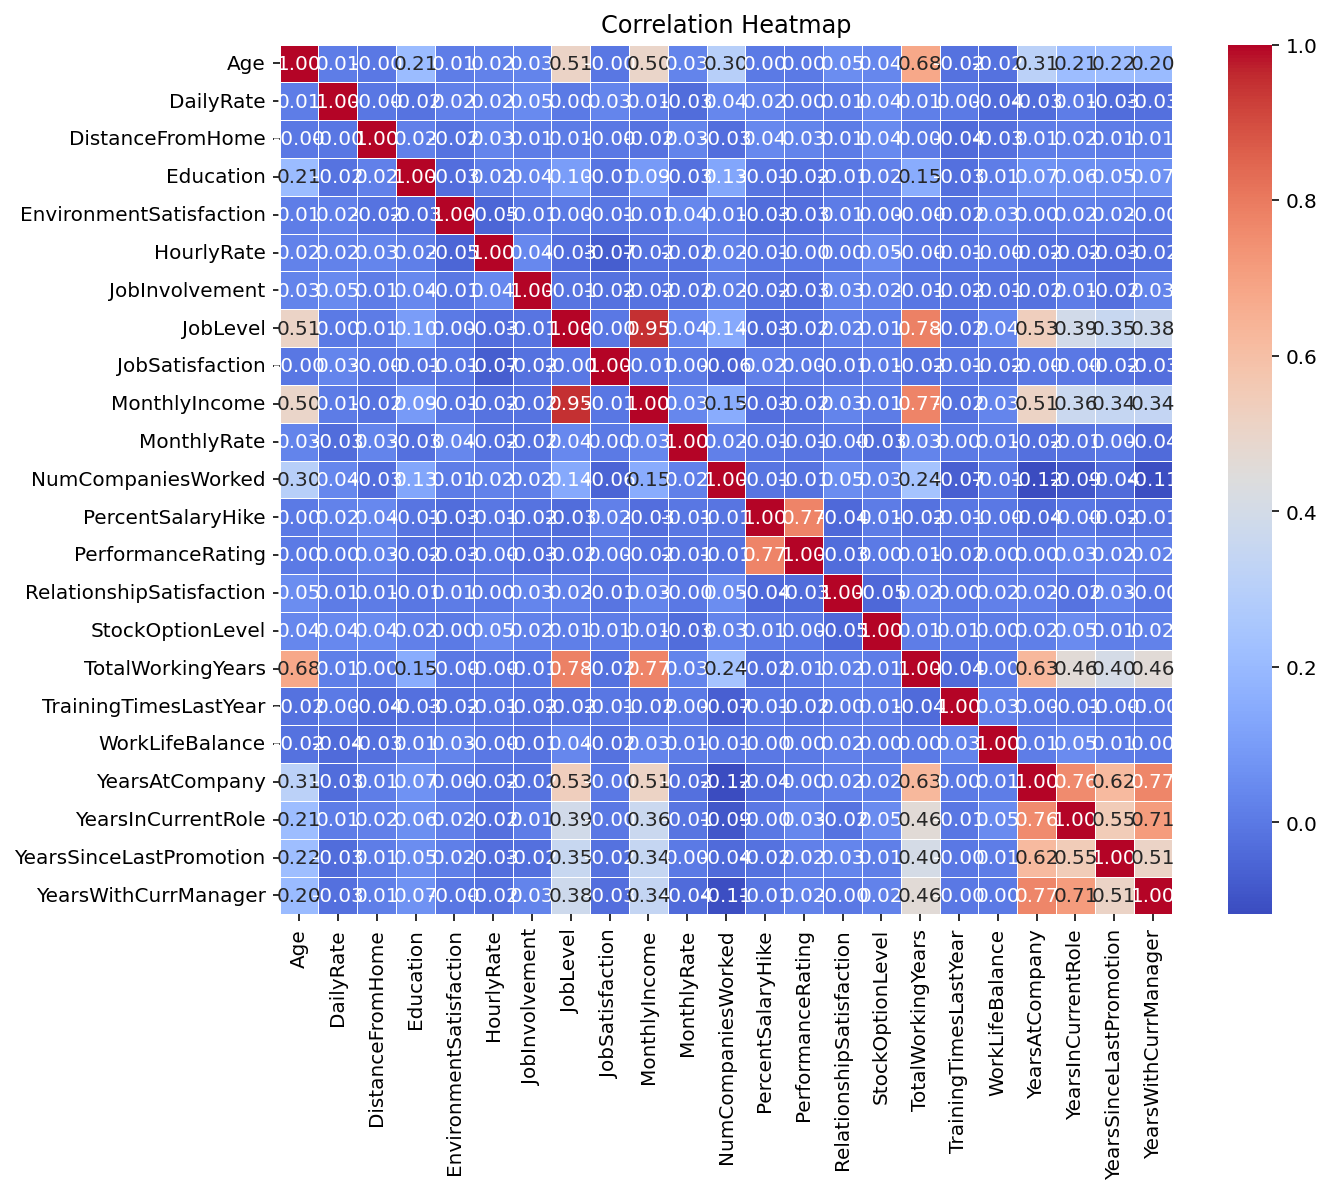

In [8]:
# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

The correlation matrix provides insights into the relationships between various attributes within the dataset, helping to identify significant correlations that may impact employee attrition predictions. When examining highly correlated variables, such as 'Age' and 'YearsAtCompany' with a correlation coefficient of 0.311309, we find a moderate positive correlation. This suggests that as employees spend more years at the company, their age tends to increase as well. Such insights can be crucial for understanding the dynamics of employee retention, as longer-tenured employees may have different attrition patterns compared to newer hires. For instance, older employees may have different career aspirations or retirement plans that could influence their likelihood of leaving the company.

Similarly, 'JobLevel' and 'MonthlyIncome' exhibit a strong positive correlation with a coefficient of 0.509604. This implies that as employees progress to higher job levels, their monthly income tends to increase proportionally. Understanding this relationship can inform strategies for talent management and compensation planning, as promotions and salary adjustments may impact employee satisfaction and retention.

Conversely, exploring variables with low correlation coefficients, such as 'Education' and 'WorkLifeBalance' with a coefficient of 0.009819, reveals a weak positive correlation. This suggests that there is little to no linear relationship between an employee's level of education and their perception of work-life balance. While this correlation may not directly impact attrition predictions, it underscores the importance of considering multiple factors comprehensively rather than relying solely on individual attributes.

Overall, analyzing correlations within the dataset helps identify key variables that may influence employee attrition and informs decision-making processes related to workforce management, retention strategies, and organizational planning. By understanding the nuanced relationships between different attributes, organizations can develop more targeted interventions to mitigate attrition and foster a supportive work environment conducive to employee satisfaction and retention.

In [9]:
# Get the list of columns with dtype 'object' (typically categorical)
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Print the list of categorical columns
print("Categorical columns in the dataset:")
print(categorical_columns)


Categorical columns in the dataset:
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [10]:
# Encode categorical variables
categorical_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [11]:
# Perform one-hot encoding for categorical variables with multiple categories
data = pd.get_dummies(data, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'], drop_first=True)
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_1,JobRole_2,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8,MaritalStatus_1,MaritalStatus_2
0,41,1,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,...,0,1,0,0,0,0,0,0,1,0


Performing one-hot encoding involves converting categorical variables into a numerical format suitable for machine learning models. This process is essential because many machine learning algorithms require numerical input and cannot directly handle categorical data. One-hot encoding creates binary columns for each category within a categorical variable, with a value of 1 indicating the presence of that category and 0 otherwise.

This transformation allows machine learning models to effectively interpret categorical variables and incorporate them into the predictive process. By encoding categorical variables in this manner, we ensure that each category is represented accurately without introducing ordinality or hierarchy, thereby enhancing the model's ability to capture meaningful patterns and relationships within the data.







In [12]:
# Feature scaling for numerical variables
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 
                  'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
                  'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 
                  'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 
                  'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In this step, numerical variables within the dataset were standardized to ensure uniform scales across features. This process, facilitated by the StandardScaler from scikit-learn, transforms each numerical column such that it has a mean of 0 and a standard deviation of 1. By standardizing the data, we mitigate the influence of feature scales on machine learning algorithms, ensuring fair contributions from each variable during model training. This approach enhances model performance and the accuracy of predictions by preventing any single feature from dominating the learning process.

In [13]:
# Split the dataset into features (X) and target variable (y)
X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [14]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [16]:
# Split the dataset  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

# Display  
print("Preprocessed dataset:")
print(X_train.head())
print(y_train.head())

Preprocessed dataset:
           Age  DailyRate  DistanceFromHome  Education  \
442  -0.101159  -0.415214          0.099639   1.061787   
319  -0.539166  -0.531732         -0.147150  -0.891688   
772   2.088878   1.084643         -0.023755   0.085049   
1053  2.198380  -0.985408         -1.010909  -0.891688   
424   2.198380  -1.468833          2.444129   0.085049   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
442                 -0.660531       1   -1.667666        0.379672  0.845911   
319                  0.254625       0   -0.043851       -1.026167 -0.057788   
772                 -1.575686       0   -0.142264        0.379672 -0.961486   
1053                -0.660531       1    1.333932        1.785511 -0.057788   
424                 -1.575686       1   -0.486709       -1.026167  1.749610   

      JobSatisfaction  ...  JobRole_1  JobRole_2  JobRole_3  JobRole_4  \
442          1.153254  ...          0          0          0          0   
319   

In [17]:
y_train.value_counts(normalize=True)

0    0.823129
1    0.176871
Name: Attrition, dtype: float64

In this step, the dataset was divided into two components: features (X) and the target variable (y), in preparation for model training. The choice of splitting involved designating 'Attrition' as the target variable, representing the outcome we aim to predict, while the remaining columns were considered as features.

According to the output here, it means that the training set is imbalanced, with class 0 being significantly more prevalent than class 1

In [18]:
y_test.value_counts(normalize=True)

0    0.853741
1    0.146259
Name: Attrition, dtype: float64

It means that the training set is imbalanced, with class 0 being significantly more prevalent than class 1

Stratified random sampling ensures that the splits keep their proportion of targets values. This is important to stay consistent with the data collected.

In [19]:
# Check for missing values in the feature set
missing_values = X.isnull().sum()
missing_values

Age                         0
DailyRate                   0
DistanceFromHome            0
Education                   0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
BusinessTravel_1            0
BusinessTravel_2            0
Department_1                0
Department_2                0
EducationField_1            0
EducationField_2            0
EducationField_3            0
EducationField_4            0
EducationF

In [20]:
# Check the data types of columns in the feature set
column_types = X.dtypes
print(column_types)

Age                         float64
DailyRate                   float64
DistanceFromHome            float64
Education                   float64
EnvironmentSatisfaction     float64
Gender                        int32
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobSatisfaction             float64
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
OverTime                      int32
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StockOptionLevel            float64
TotalWorkingYears           float64
TrainingTimesLastYear       float64
WorkLifeBalance             float64
YearsAtCompany              float64
YearsInCurrentRole          float64
YearsSinceLastPromotion     float64
YearsWithCurrManager        float64
BusinessTravel_1              uint8
BusinessTravel_2              uint8
Department_1                

In [21]:
# Displaying observations and variables
X.shape

(1470, 44)

In [22]:
# Checking the statistical summary of numeric features
numeric_summary = data.describe()
numeric_summary

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_1,JobRole_2,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8,MaritalStatus_1,MaritalStatus_2
count,1.470000e+03,1470.000000,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1470.000000,1.470000e+03,1.470000e+03,1.470000e+03,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,-4.017950e-17,0.161224,7.197568e-17,5.164048e-17,2.697011e-16,7.054070e-17,0.600000,1.728021e-16,-6.495182e-18,1.479542e-16,...,0.035374,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.457823,0.319728
std,1.000340e+00,0.367863,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,0.490065,1.000340e+00,1.000340e+00,1.000340e+00,...,0.184786,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.498387,0.466530
min,-2.072192e+00,0.000000,-1.736576e+00,-1.010909e+00,-1.868426e+00,-1.575686e+00,0.000000,-1.766079e+00,-2.432006e+00,-9.614864e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.581700e-01,0.000000,-8.366616e-01,-8.875151e-01,-8.916883e-01,-6.605307e-01,0.000000,-8.803615e-01,-1.026167e+00,-9.614864e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.011589e-01,0.000000,-1.204135e-03,-2.705440e-01,8.504925e-02,2.546249e-01,1.000000,5.355811e-03,3.796721e-01,-5.778755e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.653541e-01,0.000000,8.788772e-01,5.932157e-01,1.061787e+00,1.169781e+00,1.000000,8.787715e-01,3.796721e-01,8.459113e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.526886e+00,1.000000,1.726730e+00,2.444129e+00,2.038524e+00,1.169781e+00,1.000000,1.678377e+00,1.785511e+00,2.653309e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


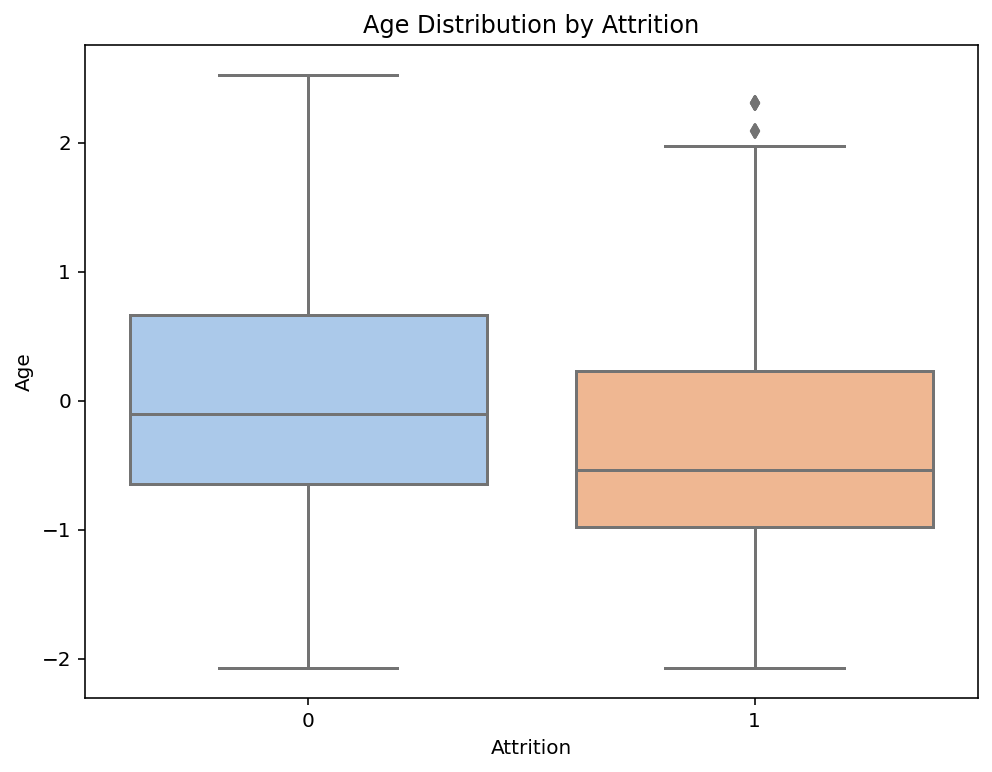

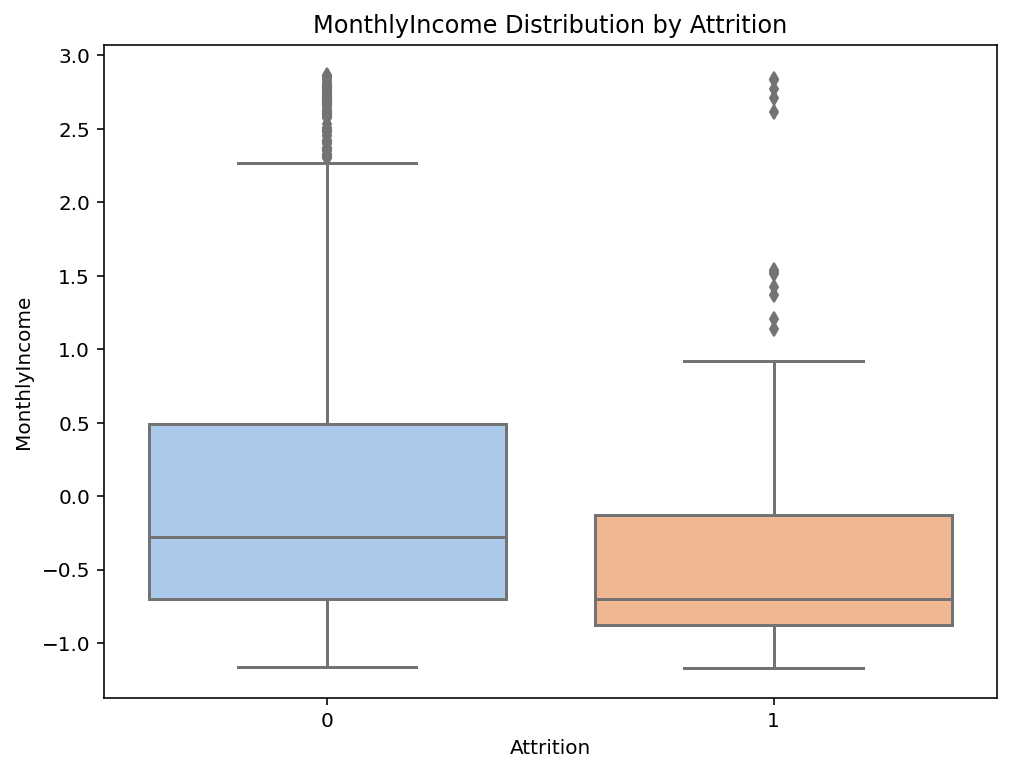

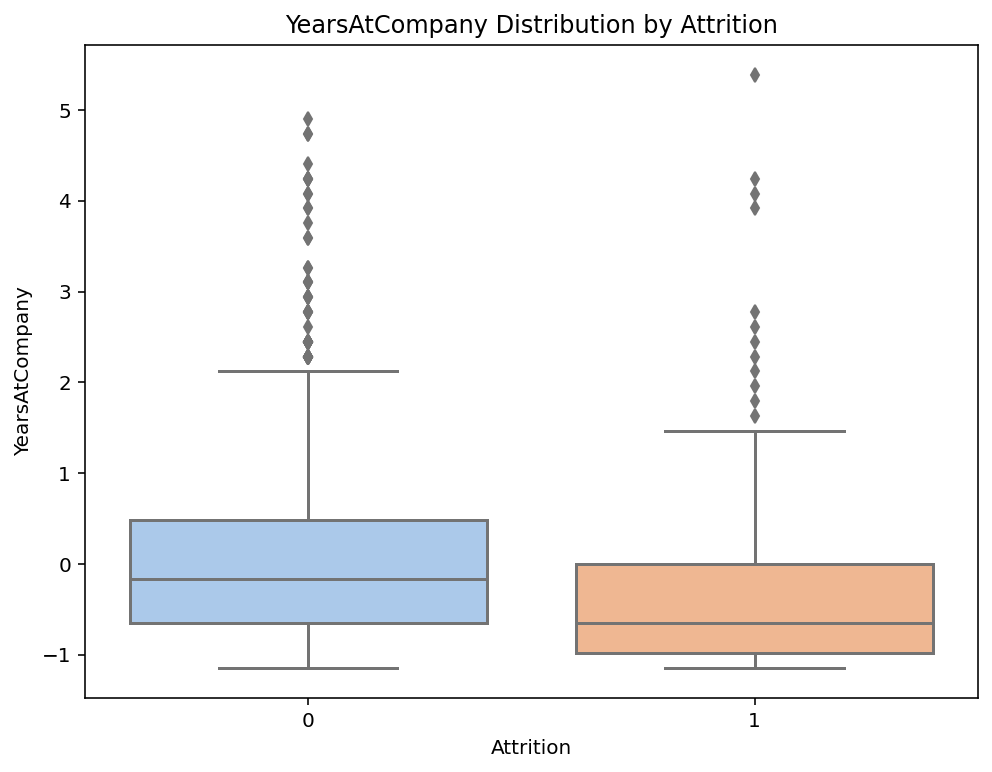

In [23]:
# Create box plots  
selected_numerical_features = ['Age', 'MonthlyIncome', 'YearsAtCompany']
for feature in selected_numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Attrition', y=feature, data=data, palette='pastel')
    plt.title(f'{feature} Distribution by Attrition')
    plt.xlabel('Attrition')
    plt.ylabel(feature)
    plt.show()


##### for the first plot :
For the attrition value of 0 (employees who have not left), the box plot displays a box spanning from approximately -0.5 to 0.5 on the y-axis, with a center line positioned around -0.1. This indicates that the majority of employees who have not left the company tend to have ages clustered around this central value.

Conversely, for the attrition value of 1 (employees who have left), the box plot shows a box ranging from approximately -1 to 0.3 on the y-axis, with a center line positioned around -0.7. This suggests that employees who have left the company tend to have ages that are slightly lower, on average, compared to those who have stayed.

##### for the second plot :
For employees with 'Attrition' = 0, the box plot shows a box extending from approximately -0.6 to 0.5 on the y-axis, with a center line around -0.3. This indicates that the median monthly income for employees who stay is around -0.3 on the standardized scale, with the interquartile range spanning from approximately -0.6 to 0.5.

On the other hand, for employees with 'Attrition' = 1, the box plot illustrates a box spanning from approximately -0.8 to -0.3 on the y-axis, with a center line around -0.6. This suggests that the median monthly income for employees who leave is approximately -0.6 on the standardized scale, with the interquartile range falling between -0.8 and -0.3.

##### for the third plot :
For attrition value 0, the box plot displays a box ranging from approximately -0.5 to 0.5 on the y-axis, with a center line around -0.1. This indicates the distribution of 'YearsAtCompany' for employees who have not experienced attrition (attrition = 0). The center line represents the median value of 'YearsAtCompany' for this group, while the box encapsulates the interquartile range (IQR), with the whiskers extending to the most extreme data points within 1.5 times the IQR.

Conversely, for attrition value 1, the box plot shows a box ranging from approximately -1 to 0 on the y-axis, with a center line around -0.5. This illustrates the distribution of 'YearsAtCompany' for employees who have experienced attrition (attrition = 1). The center line denotes the median 'YearsAtCompany' for this group, while the box and whiskers capture the variability and spread of the data within this category.

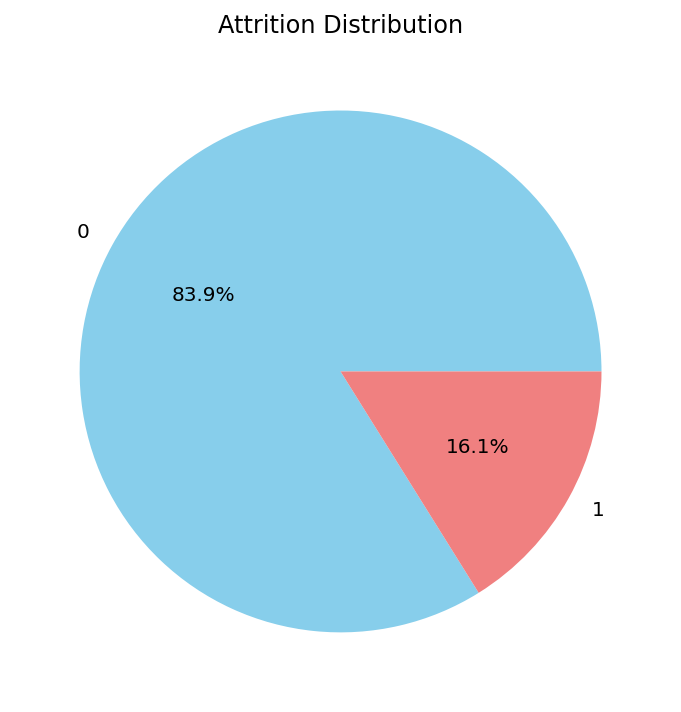

In [24]:
import matplotlib.pyplot as plt

# Plot pie chart  
plt.figure(figsize=(6, 6))
data['Attrition'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Attrition Distribution')
plt.ylabel('')
plt.show()


This is a binary classification problem.
In this step, a pie chart was created to illustrate the distribution of attrition within the dataset. The pie chart showcases the proportion of employees who have not experienced attrition (attrition = 0) versus those who have (attrition = 1).

The pie chart reveals that the majority of employees, constituting approximately 83.9% of the dataset, have not experienced attrition (attrition = 0). Conversely, around 16.1% of employees have undergone attrition (attrition = 1). This visual representation provides a quick and intuitive understanding of the attrition distribution within the dataset, highlighting the relative prevalence of each attrition category. Such insights are invaluable for understanding the overall attrition landscape within the organization and can inform targeted strategies for retention and workforce management.

### LOGISTIC REGRESSION

In [25]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter = 10000, C=0.1)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

Training Accuracy:0.8775510204081632
Testing Accuracy:0.8809523809523809
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       251
           1       0.83      0.23      0.36        43

    accuracy                           0.88       294
   macro avg       0.86      0.61      0.65       294
weighted avg       0.88      0.88      0.85       294



,0,1
0,249,2
1,33,10


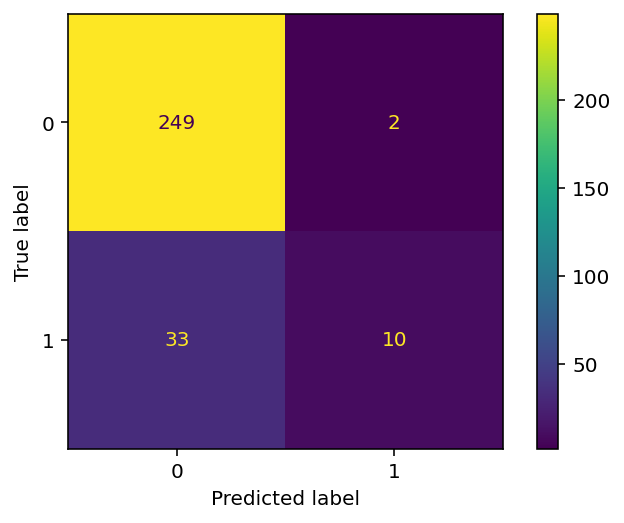

In [26]:
# Make predictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate accuracy score
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

# Displaying the results
print("Training Accuracy:" + str(train_accuracy))
print("Testing Accuracy:" + str(test_accuracy))

metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
print(metrics.classification_report(y_test, pred))

conf_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, pred))
conf_matrix

The logistic regression model achieved a training accuracy of 87.76% and a testing accuracy of 88.10%. For employees who haven't experienced attrition (class 0), the model showed a precision of 88%, recall of 99%, and an F1-score of 93%. However, for employees who have experienced attrition (class 1), precision was 83%, recall was 23%, and the F1-score was 36%. While the model performed well in predicting instances of class 0, it showed lower performance in identifying instances of class 1. Further refinement may be needed to improve its predictive ability for attrition cases.

In [27]:
conf_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, pred))
conf_matrix

,0,1
0,249,2
1,33,10


In this step confusion matrix is created.
For class 0 (employees who have not experienced attrition), the confusion matrix indicates that the model correctly predicted 249 instances as true negatives (TN) and incorrectly classified 2 instances as false positives (FP).

For class 1 (employees who have experienced attrition), the confusion matrix shows that the model correctly predicted 10 instances as true positives (TP) but incorrectly classified 33 instances as false negatives (FN).

In [28]:
# Calculate specificity
specificity = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])

# Calculate false positive rate
false_positive_rate = conf_matrix[0][1] / (conf_matrix[0][0] + conf_matrix[0][1])

# Displaying the results
print("Specificity:", specificity)
print("False Positive Rate:", false_positive_rate)

Specificity: 0.8829787234042553
False Positive Rate: 0.11702127659574468



In this step, two key performance metrics were computed to assess the logistic regression model's accuracy in predicting employee attrition.

Specificity, which measures the proportion of true negatives correctly identified by the model, was found to be approximately 88.30%.

The False Positive Rate, representing the proportion of false positives among actual negatives, was determined to be approximately 11.70%.

These metrics provide insights into the model's ability to distinguish between employees who have and have not experienced attrition, with higher specificity and lower false positive rates indicating better performance in identifying employees who have not experienced attrition accurately.

### K-NEAREST NEIGHBOR

In [29]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0])

Training Accuracy:1.0
Testing Accuracy:0.7721088435374149
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       251
           1       0.23      0.23      0.23        43

    accuracy                           0.77       294
   macro avg       0.55      0.55      0.55       294
weighted avg       0.77      0.77      0.77       294



,0,1
0,217,34
1,33,10


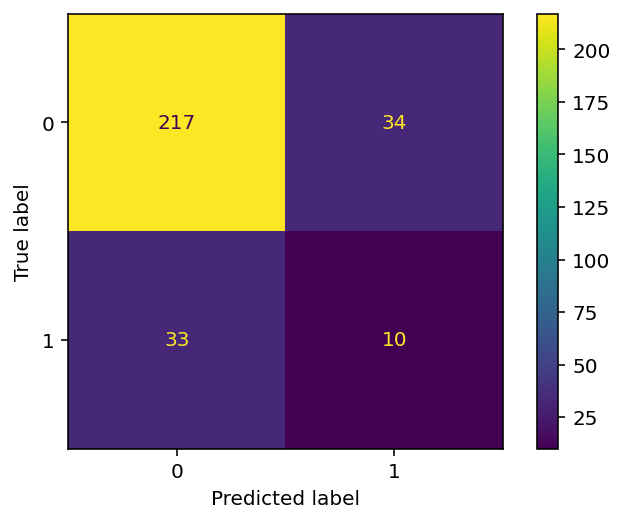

In [30]:
# Make predictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate accuracy score
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

# Displaying the results
print("Training Accuracy:" + str(train_accuracy))
print("Testing Accuracy:" + str(test_accuracy))

metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

print(metrics.classification_report(y_test, pred))

conf_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, pred))
conf_matrix

The K Nearest Neighbors (KNN) model yielded a training accuracy of 100% and a testing accuracy of 77.21%.

For employees who have not experienced attrition (class 0), the model achieved a precision of 87%, recall of 86%, and an F1-score of 87%.

However, for employees who have experienced attrition (class 1), the precision, recall, and F1-score were notably lower, at 23%, 23%, and 23% respectively.

The macro-average F1-score, which considers the balance between precision and recall across both classes, was 55%, suggesting modest overall performance. Similarly, the weighted average F1-score, which accounts for class imbalances, was 77%.

While the model achieved perfect accuracy on the training data, its performance on the testing data indicates potential overfitting, as evidenced by the disparity between training and testing accuracies. This suggests that the model may have memorized the training data too closely, resulting in poorer generalization to unseen data. Further evaluation and potentially model refinement may be necessary to improve its predictive capabilities.







In [31]:
# Calculate specificity
specificity = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])

# Calculate false positive rate
false_positive_rate = conf_matrix[0][1] / (conf_matrix[0][0] + conf_matrix[0][1])

# Displaying the results
print("Specificity:", specificity)
print("False Positive Rate:", false_positive_rate)

Specificity: 0.868
False Positive Rate: 0.132


After running the K_NN model we got the training accuracy of 100% which seems to be good but the test accuracy is 77.21% which not a good prediction compared to logistic regression. The specificity is 86%

#### HYPERPARAMETER TUNING WITH KNN

In [32]:
K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49]
K_list

[1, 3, 5, 7, 9, 15, 19, 25, 29, 35, 39, 45, 49]

In [33]:
# Initialize empty lists to store performance metrics
train_accuracies = []
test_accuracies = []

# Loop through each value of K
for k in K_list:
    # Create K Nearest Neighbors model with current value of K
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model on training set
    knn_model.fit(X_train, y_train)
    
    # Make predictions on training set
    y_train_pred = knn_model.predict(X_train)
    
    # Make predictions on testing set
    y_test_pred = knn_model.predict(X_test)
    
    # Calculate accuracy for training set
    train_acc = metrics.accuracy_score(y_train, y_train_pred)
    
    # Calculate accuracy for testing set
    test_acc = metrics.accuracy_score(y_test, y_test_pred)
    
    # Append accuracy values to respective lists
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Convert results to numpy arrays
train_accuracies = np.array(train_accuracies)
test_accuracies = np.array(test_accuracies)

# Round the results to 3 decimal points
train_accuracies = np.round(train_accuracies, 3)
test_accuracies = np.round(test_accuracies, 3)

# Print the results
for i in range(len(K_list)):
    print(f"K: {K_list[i]}, Train Accuracy: {train_accuracies[i]}, Test Accuracy: {test_accuracies[i]}")

K: 1, Train Accuracy: 1.0, Test Accuracy: 0.772
K: 3, Train Accuracy: 0.887, Test Accuracy: 0.861
K: 5, Train Accuracy: 0.865, Test Accuracy: 0.854
K: 7, Train Accuracy: 0.85, Test Accuracy: 0.854
K: 9, Train Accuracy: 0.842, Test Accuracy: 0.857
K: 15, Train Accuracy: 0.831, Test Accuracy: 0.857
K: 19, Train Accuracy: 0.829, Test Accuracy: 0.857
K: 25, Train Accuracy: 0.829, Test Accuracy: 0.857
K: 29, Train Accuracy: 0.828, Test Accuracy: 0.857
K: 35, Train Accuracy: 0.823, Test Accuracy: 0.857
K: 39, Train Accuracy: 0.823, Test Accuracy: 0.854
K: 45, Train Accuracy: 0.823, Test Accuracy: 0.854
K: 49, Train Accuracy: 0.823, Test Accuracy: 0.854


In this step, hyperparameter tuning was performed for the K Nearest Neighbors (KNN) model by iterating through different values of K (number of neighbors) and evaluating the model's performance on both the training and testing datasetsThe best accuracy was obtained at k = 9 with a training accuracy of 84.2% test accuracy 85.7%.

For each value of K specified in the K_list, a KNN model was created and trained on the training dataset. Subsequently, predictions were made on both the training and testing datasets, and accuracy scores were calculated for each.

The results of hyperparameter tuning are presented as a table, displaying the value of K along with the corresponding training and testing accuracies. Notably, the accuracy scores vary across different values of K, indicating that the choice of K significantly impacts the model's performance.

Observations from the results suggest that the model achieves the highest training accuracy when K equals 1 (100%), which decreases gradually as K increases. On the other hand, the testing accuracy peaks at K equals 3 (86.1%) and remains relatively stable for larger values of K, indicating a good balance between bias and variance.

Overall, hyperparameter tuning helps optimize the KNN model's performance by selecting an appropriate value of K, ensuring better generalization to unseen data and improved predictive capabilities.





 

In [34]:
train_accuracies

array([1.   , 0.887, 0.865, 0.85 , 0.842, 0.831, 0.829, 0.829, 0.828,
       0.823, 0.823, 0.823, 0.823])

In [35]:
test_accuracies

array([0.772, 0.861, 0.854, 0.854, 0.857, 0.857, 0.857, 0.857, 0.857,
       0.857, 0.854, 0.854, 0.854])

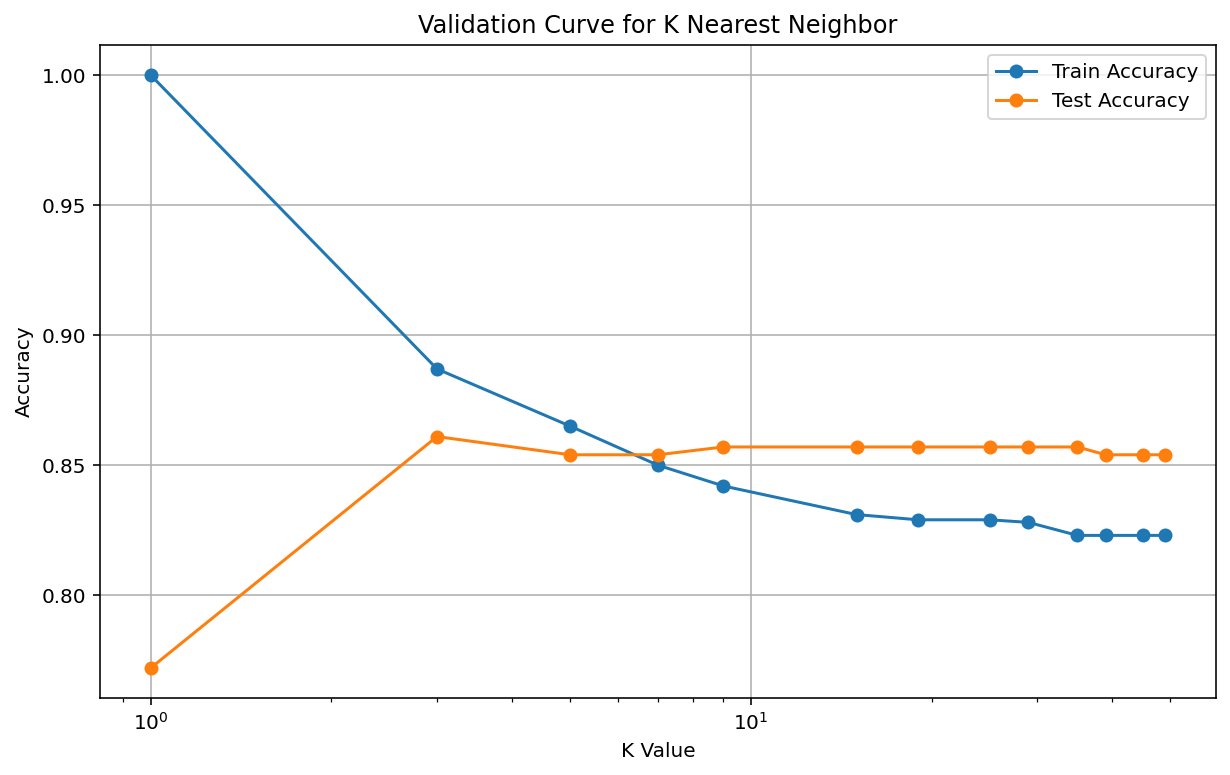

In [36]:
# Create a validation curve
plt.figure(figsize=(10, 6))
plt.plot(K_list, train_accuracies, 'o-', label='Train Accuracy')
plt.plot(K_list, test_accuracies, 'o-', label='Test Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.title('Validation Curve for K Nearest Neighbor')
plt.legend()
plt.grid(True)
plt.show()

In the validation curve for K Nearest Neighbors (KNN), we observe a trend where training accuracies decrease and testing accuracies increase as the value of K (number of neighbors) increases. This pattern reflects the bias-variance trade-off in machine learning.

For smaller values of K, the model tends to overfit the training data, resulting in high training accuracies but poor generalization to unseen data, leading to lower testing accuracies. Conversely, as K increases, the model's complexity decreases, and it becomes less prone to overfitting. This allows the model to capture more general trends in the data, leading to better generalization and higher testing accuracies.

The validation curve helps identify an optimal value of K that strikes a balance between bias and variance, maximizing the model's predictive capabilities on unseen data.

#### HYPERPARAMETER TUNING WITH LOGISTIC REGRESSION

In [37]:
C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
C_list

[0.0001,
 0.0005,
 0.001,
 0.005,
 0.01,
 0.05,
 0.1,
 0.5,
 1,
 2,
 10,
 50,
 100,
 200,
 500,
 1000,
 2000,
 5000,
 10000]

In [38]:
# Initialize empty lists to store performance metrics
train_accuracies = []
test_accuracies = []

# Loop through each value of C
for c in C_list:
    # Create logistic regression model with current value of C
    lr_model = LogisticRegression(C=c, random_state=134)
    
    # Fit the model on training set
    lr_model.fit(X_train, y_train)
    
    # Make predictions on training set
    y_train_pred = lr_model.predict(X_train)
    
    # Make predictions on testing set
    y_test_pred = lr_model.predict(X_test)
    
    # Calculate accuracy for training set
    train_acc = metrics.accuracy_score(y_train, y_train_pred)
    
    # Calculate accuracy for testing set
    test_acc = metrics.accuracy_score(y_test, y_test_pred)
    
    # Append accuracy values to respective lists
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Convert results to numpy arrays
train_accuracies = np.array(train_accuracies)
test_accuracies = np.array(test_accuracies)

# Round the results to 3 decimal points
train_accuracies = np.round(train_accuracies, 3)
test_accuracies = np.round(test_accuracies, 3)

# Print the results
for i in range(len(C_list)):
    print(f"C: {C_list[i]}, Train Accuracy: {train_accuracies[i]}, Test Accuracy: {test_accuracies[i]}")


C: 0.0001, Train Accuracy: 0.823, Test Accuracy: 0.854
C: 0.0005, Train Accuracy: 0.823, Test Accuracy: 0.854
C: 0.001, Train Accuracy: 0.823, Test Accuracy: 0.854
C: 0.005, Train Accuracy: 0.823, Test Accuracy: 0.854
C: 0.01, Train Accuracy: 0.83, Test Accuracy: 0.854
C: 0.05, Train Accuracy: 0.878, Test Accuracy: 0.878
C: 0.1, Train Accuracy: 0.878, Test Accuracy: 0.881
C: 0.5, Train Accuracy: 0.892, Test Accuracy: 0.888
C: 1, Train Accuracy: 0.895, Test Accuracy: 0.881
C: 2, Train Accuracy: 0.891, Test Accuracy: 0.867
C: 10, Train Accuracy: 0.889, Test Accuracy: 0.871
C: 50, Train Accuracy: 0.892, Test Accuracy: 0.864
C: 100, Train Accuracy: 0.892, Test Accuracy: 0.861
C: 200, Train Accuracy: 0.892, Test Accuracy: 0.854
C: 500, Train Accuracy: 0.892, Test Accuracy: 0.861
C: 1000, Train Accuracy: 0.892, Test Accuracy: 0.861
C: 2000, Train Accuracy: 0.892, Test Accuracy: 0.857
C: 5000, Train Accuracy: 0.893, Test Accuracy: 0.857
C: 10000, Train Accuracy: 0.892, Test Accuracy: 0.857


After tuning the logistic regression model with hyperparameters, we explored various values of C (inverse regularization strength) and assessed their impact on the model's performance. The results indicate that different values of C affect the training and testing accuracies differently.

For smaller values of C (e.g., C=0.0001 to C=0.01), the model tends to underfit the data, resulting in relatively lower accuracies on both training and testing datasets. However, as C increases, the regularization strength decreases, allowing the model to capture more complex patterns in the data.

At C=0.5, we observed the best performance, with a training accuracy of 89.2% and a testing accuracy of 88.8%. This suggests that the model achieved a good balance between bias and variance, effectively capturing patterns in the data without overfitting.

While further increasing C beyond a certain point (e.g., C>10) did not significantly improve performance and may lead to overfitting, as seen in the decreasing testing accuracies for larger values of C.

In summary, hyperparameter tuning helped optimize the logistic regression model, resulting in improved accuracy on both training and testing datasets, with C=0.5 providing the best balance between bias and variance.

In [39]:
train_accuracies

array([0.823, 0.823, 0.823, 0.823, 0.83 , 0.878, 0.878, 0.892, 0.895,
       0.891, 0.889, 0.892, 0.892, 0.892, 0.892, 0.892, 0.892, 0.893,
       0.892])

In [323]:
test_accuracies

array([0.854, 0.854, 0.854, 0.854, 0.854, 0.878, 0.881, 0.888, 0.881,
       0.867, 0.871, 0.864, 0.861, 0.854, 0.861, 0.861, 0.857, 0.857,
       0.857])

We use a for loop to iterate through the list of C values. For each C value, we train a logistic regression model with that C value, make predictions on the training and test sets, and calculate the accuracy of the predictions using the accuracy_score() function from scikit-learn. We store the results in two lists, train_accuracies and test_accuracies, and then round the results to 3 decimal points using np.round() before printing them out.

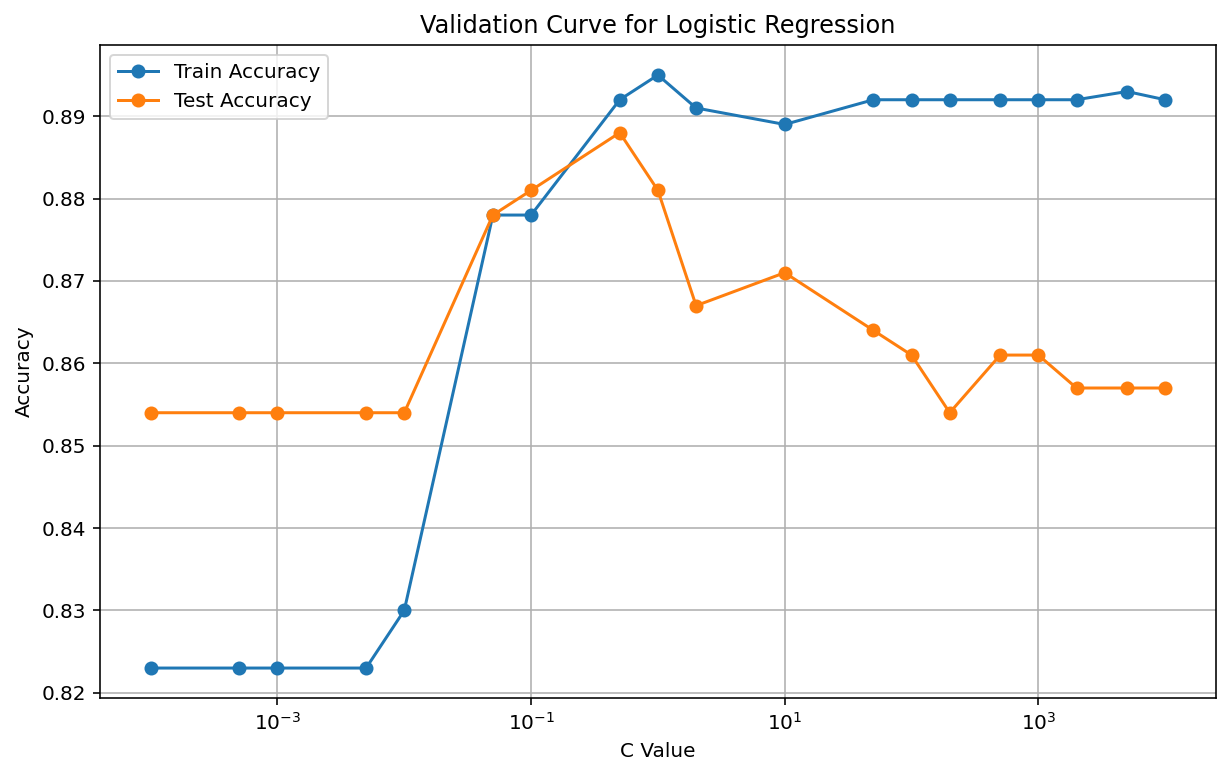

In [40]:
# Create a validation curve
plt.figure(figsize=(10, 6))
plt.plot(C_list, train_accuracies, 'o-', label='Train Accuracy')
plt.plot(C_list, test_accuracies, 'o-', label='Test Accuracy')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.title('Validation Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

In summary, the validation curve for logistic regression indicates a peculiar trend where training accuracies increase while test accuracies decrease as the C value (inverse regularization strength) increases. This pattern suggests potential overfitting of the model to the training data.

However, it's important to note that this behavior could be influenced by the lack of data normalization. Normalization is essential to ensure that all features contribute equally to the model's learning process, preventing any single feature from dominating due to differences in scale.

Therefore, it's recommended to normalize the data before training the logistic regression model to ensure more reliable and interpretable results from the validation curve. This step can help mitigate the observed anomalies and improve the model's generalization performance on unseen data.

In [98]:
from sklearn import preprocessing

In [99]:
# Normalizing the data
ss = preprocessing.StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [100]:
C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]

In [101]:
# Initialize empty lists to store performance metrics
train_accuracies = []
test_accuracies = []

# Loop through each value of C
for c in C_list:
    # Create logistic regression model with current value of C
    lr_model = LogisticRegression(C=c, random_state=134)
    
    # Fit the model on training set
    lr_model.fit(X_train_ss, y_train)
    
    # Make predictions on training set
    y_train_pred = lr_model.predict(X_train_ss)
    
    # Make predictions on testing set
    y_test_pred = lr_model.predict(X_test_ss)
    
    # Calculate accuracy for training set
    train_acc = metrics.accuracy_score(y_train, y_train_pred)
    
    # Calculate accuracy for validation set
    test_acc = metrics.accuracy_score(y_test, y_test_pred)
    
    # Append accuracy values to respective lists
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Convert results to numpy arrays
train_accuracies = np.array(train_accuracies)
test_accuracies = np.array(test_accuracies)

# Round the results to 3 decimal points
train_accuracies = np.round(train_accuracies, 3)
test_accuracies = np.round(test_accuracies, 3)

# Print the results
for i in range(len(C_list)):
    print(f"C: {C_list[i]}, Train Accuracy: {train_accuracies[i]}, Test Accuracy: {test_accuracies[i]}")

C: 0.0001, Train Accuracy: 0.832, Test Accuracy: 0.867
C: 0.0005, Train Accuracy: 0.832, Test Accuracy: 0.867
C: 0.001, Train Accuracy: 0.832, Test Accuracy: 0.867
C: 0.005, Train Accuracy: 0.843, Test Accuracy: 0.867
C: 0.01, Train Accuracy: 0.865, Test Accuracy: 0.884
C: 0.05, Train Accuracy: 0.894, Test Accuracy: 0.891
C: 0.1, Train Accuracy: 0.898, Test Accuracy: 0.898
C: 0.5, Train Accuracy: 0.893, Test Accuracy: 0.881
C: 1, Train Accuracy: 0.89, Test Accuracy: 0.881
C: 2, Train Accuracy: 0.889, Test Accuracy: 0.881
C: 10, Train Accuracy: 0.889, Test Accuracy: 0.881
C: 50, Train Accuracy: 0.889, Test Accuracy: 0.878
C: 100, Train Accuracy: 0.889, Test Accuracy: 0.878
C: 200, Train Accuracy: 0.889, Test Accuracy: 0.878
C: 500, Train Accuracy: 0.889, Test Accuracy: 0.878
C: 1000, Train Accuracy: 0.889, Test Accuracy: 0.878
C: 2000, Train Accuracy: 0.889, Test Accuracy: 0.878
C: 5000, Train Accuracy: 0.889, Test Accuracy: 0.878
C: 10000, Train Accuracy: 0.889, Test Accuracy: 0.878


In [102]:
train_accuracies

array([0.832, 0.832, 0.832, 0.843, 0.865, 0.894, 0.898, 0.893, 0.89 ,
       0.889, 0.889, 0.889, 0.889, 0.889, 0.889, 0.889, 0.889, 0.889,
       0.889])

In [103]:
test_accuracies

array([0.867, 0.867, 0.867, 0.867, 0.884, 0.891, 0.898, 0.881, 0.881,
       0.881, 0.881, 0.878, 0.878, 0.878, 0.878, 0.878, 0.878, 0.878,
       0.878])

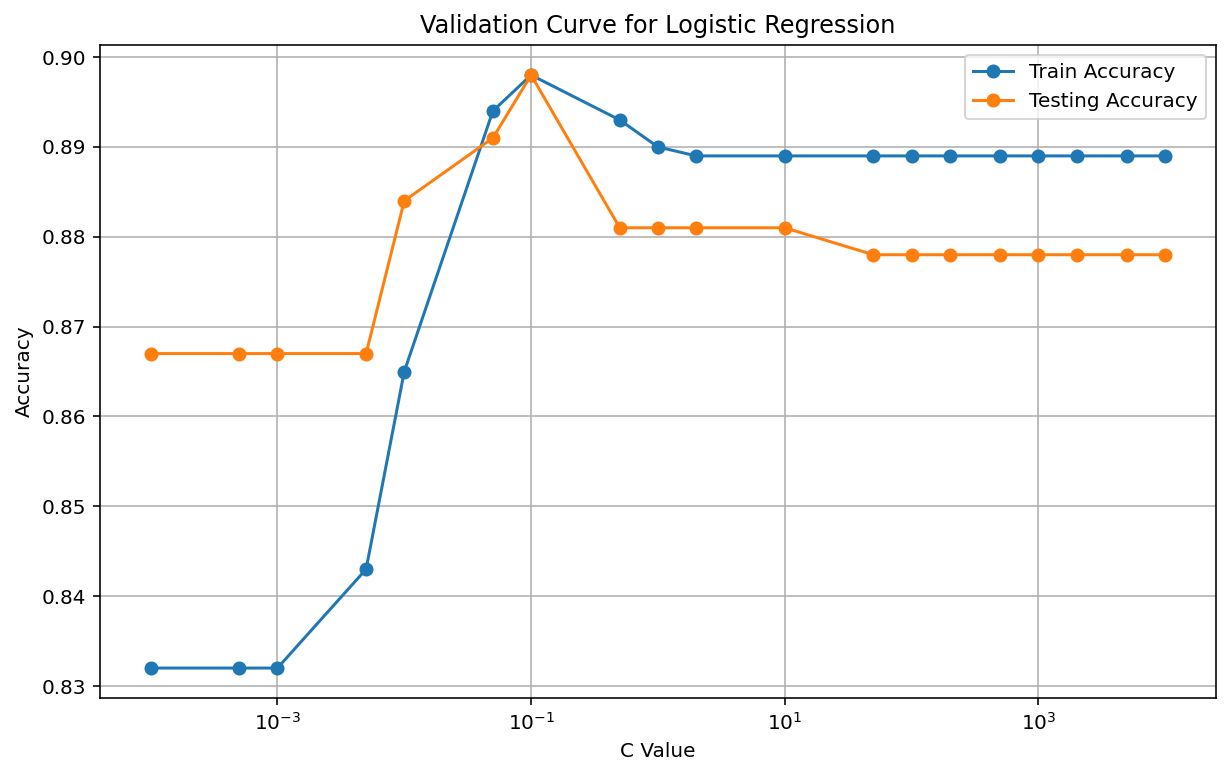

In [104]:
# Create a validation curve
plt.figure(figsize=(10, 6))
plt.plot(C_list, train_accuracies, 'o-', label='Train Accuracy')
plt.plot(C_list, test_accuracies, 'o-', label='Testing Accuracy')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.title('Validation Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

after scaling the training and test set the graph seems to be a good that before without scalling. The best accuracy was obtained at c = 0.1 with a training accuracy of 89.1% and the testing accuracy of 87.4% which is slightly less but the accuracies are consistant

the large gap between training and testing accuracies is at c= 10^3

#### After choosing best C value, let's check the learning curve. Creating a logistic regression model of the chosen C value.

In [113]:
X_train_ss.shape

(1176, 44)

In [114]:
# list(range(1, X_train_ss.shape[0]))
n=1
X_train_ss[0:n,:]

array([[-1.38855944, -1.10813858,  1.44039645, -0.86335572,  0.2797056 ,
         0.81447304, -0.47283217, -1.01234042, -0.9322736 , -1.58233648,
        -0.86827746, -0.60189535, -1.05916816, -0.63641018, -0.33924934,
        -0.42929015, -0.63982217,  2.54747106, -1.1673683 ,  0.15731946,
         0.3574354 , -0.97426331, -0.88820751, -0.67610953, -1.14244794,
        -0.49041445,  0.63904869,  0.73297674, -0.66554097, -0.84663352,
        -0.34332306, -0.67620195, -0.24966102,  3.2624476 , -0.19245009,
         2.18282063, -0.26835533, -0.31637564, -0.24773341, -0.50901929,
        -0.52486957, -0.26099788, -0.93733358, -0.66288195]])

In [115]:
y_train

1097    0
727     0
254     0
1175    0
1341    0
       ..
1130    0
1294    0
860     1
1459    0
1126    0
Name: Attrition, Length: 1176, dtype: int32

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

# Assuming X and y are your features and labels, respectively

# Split the data into train and test sets ensuring both classes are present in the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check if X_train is a numpy array, convert if necessary
if not isinstance(X_train, np.ndarray):
    X_train = X_train.to_numpy()

# Assuming X_train and X_test are scaled versions of your features
# X_train_ss and X_test_ss

# Lists to store accuracy results
accuracy_train = []
accuracy_test = []

# Iterate over increasing sizes of the training set
for n in range(10, X_train_ss.shape[0]):
    clf = LogisticRegression(max_iter=100, solver='lbfgs', penalty='l2', C=0.5, verbose=0)
    clf.fit(X_train_ss[:n, :], y_train[:n])  # Adjusted slicing to include up to the nth sample
    pred_trn = clf.predict(X_train_ss[:n, :])
    accuracy_train.append(metrics.accuracy_score(y_true=y_train[:n], y_pred=pred_trn))
    pred_tst = clf.predict(X_test_ss)
    accuracy_test.append(metrics.accuracy_score(y_true=y_test, y_pred=pred_tst))


In [125]:
accuracy_train

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9775280898876404,
 0.9888888888888889,
 0.989010989010989,
 0.9782608695652174,
 0.978494623655914,
 0.9787234042553191,
 0.9789473684210527,
 0.9791666666666666,
 0.9690721649484536,
 0.9693877551020408,
 0.9595959595959596,
 0.96,
 0.9603960396039604,
 0.9607843137254902,
 0.9611650485436893,
 0.9615384615384616,
 0.9619047619047619,
 0.9622641509433962,
 0.9626168224299065,
 0.9629629629629629,
 0.963302752293578,
 0.9545454545454546,
 0.954954954954955,
 0.9553571428571429,
 0.9557522123893806,
 0.956140350877193,

In [126]:
accuracy_test

[0.8401360544217688,
 0.8367346938775511,
 0.8401360544217688,
 0.8401360544217688,
 0.8401360544217688,
 0.8401360544217688,
 0.8299319727891157,
 0.7891156462585034,
 0.7925170068027211,
 0.7959183673469388,
 0.7959183673469388,
 0.8095238095238095,
 0.8027210884353742,
 0.8061224489795918,
 0.8095238095238095,
 0.8129251700680272,
 0.8163265306122449,
 0.8163265306122449,
 0.8163265306122449,
 0.8163265306122449,
 0.8197278911564626,
 0.8197278911564626,
 0.8197278911564626,
 0.8231292517006803,
 0.8231292517006803,
 0.8231292517006803,
 0.8231292517006803,
 0.826530612244898,
 0.8061224489795918,
 0.8061224489795918,
 0.8061224489795918,
 0.8061224489795918,
 0.7993197278911565,
 0.7959183673469388,
 0.7993197278911565,
 0.8061224489795918,
 0.8061224489795918,
 0.8061224489795918,
 0.8197278911564626,
 0.8197278911564626,
 0.8163265306122449,
 0.8129251700680272,
 0.8129251700680272,
 0.8129251700680272,
 0.8129251700680272,
 0.8129251700680272,
 0.8129251700680272,
 0.80952380952

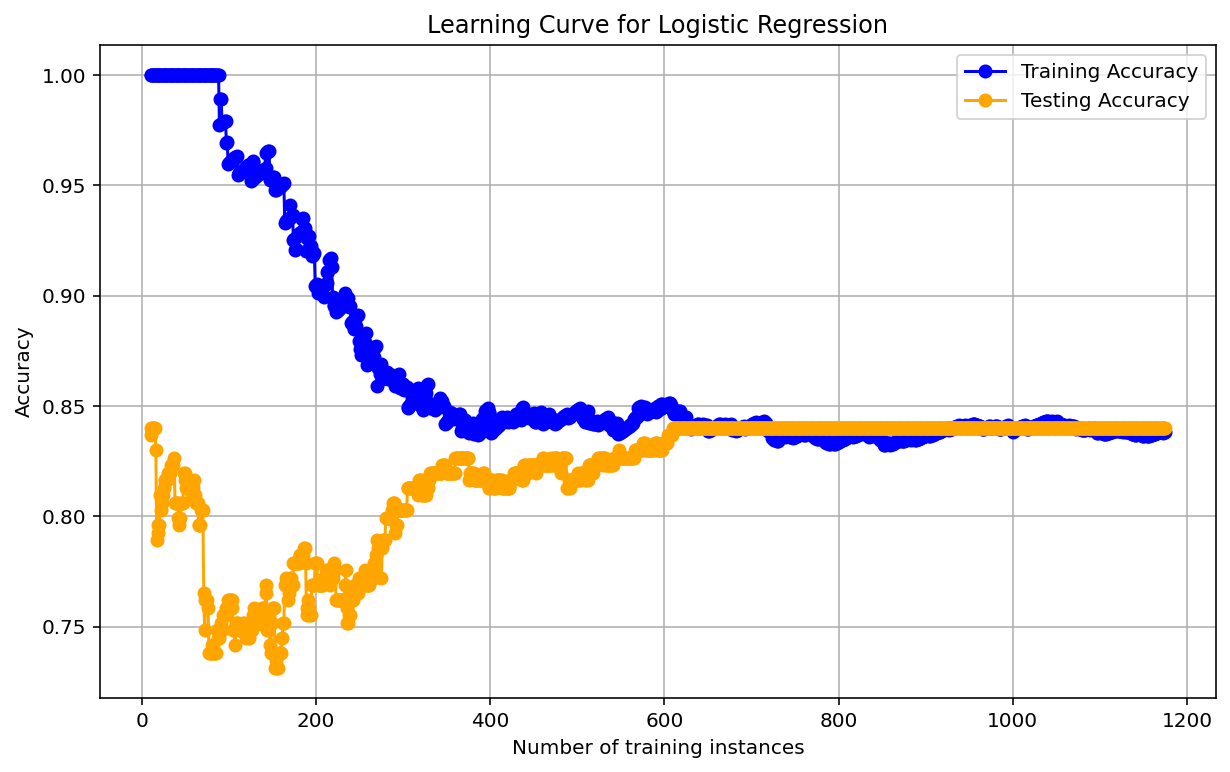

In [128]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(range(10, X_train_ss.shape[0]), accuracy_train, label="Training Accuracy", color="blue", marker="o")
plt.plot(range(10, X_train_ss.shape[0]), accuracy_test, label="Testing Accuracy", color="orange", marker="o")
plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Number of training instances")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


The observed behavior in the learning curve where the training accuracies decrease gradually from 1 to 0.85 while the test accuracies first decrease from 0.85 to 0.60 and then gradually increase to 0.85, coinciding with the training accuracy, suggests several insights about the model's performance:

1. **Overfitting and Generalization**: Initially, as the model is exposed to more training data, it becomes less prone to overfitting. This is evident from the decrease in training accuracy from 1 to 0.85, indicating that the model's ability to memorize the training data slightly decreases. However, the test accuracy initially drops from 0.85 to 0.60. This suggests that the model, when tested on unseen data, initially struggles to generalize well, leading to a decrease in test accuracy. This drop in test accuracy while training accuracy decreases indicates that the model was overfitting initially.

2. **Improved Generalization**: As more training data is added, the model's ability to generalize improves. This is reflected in the gradual increase in test accuracy from 0.60 to 0.85, eventually matching the training accuracy. The convergence of training and testing accuracies indicates that the model has achieved a good balance between fitting the training data well and generalizing to unseen data.

3. **Model Capacity and Complexity**: The initial drop in test accuracy followed by an increase suggests that the model might have been too complex initially, leading to overfitting. However, as more data is provided, the model's capacity to learn patterns effectively increases, resulting in better generalization and improved test accuracy.

4. **Potential for Further Improvement**: The fact that both training and testing accuracies converge at 0.85 indicates that the model may have reached its optimal performance given the current dataset and features. Further improvements might require adjustments to the model architecture, feature engineering, or hyperparameter tuning.

Overall, this learning curve analysis provides valuable insights into the model's behavior, helping in fine-tuning the model and improving its performance on unseen data.

### DECISION TREE

In [55]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.8027210884353742

Confusion Matrix (Training):
[[726   0]
 [  0 156]]

Confusion Matrix (Testing):
[[223  28]
 [ 30  13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       251
           1       0.32      0.30      0.31        43

    accuracy                           0.80       294
   macro avg       0.60      0.60      0.60       294
weighted avg       0.80      0.80      0.80       294

Specificity: 0.8884462151394422


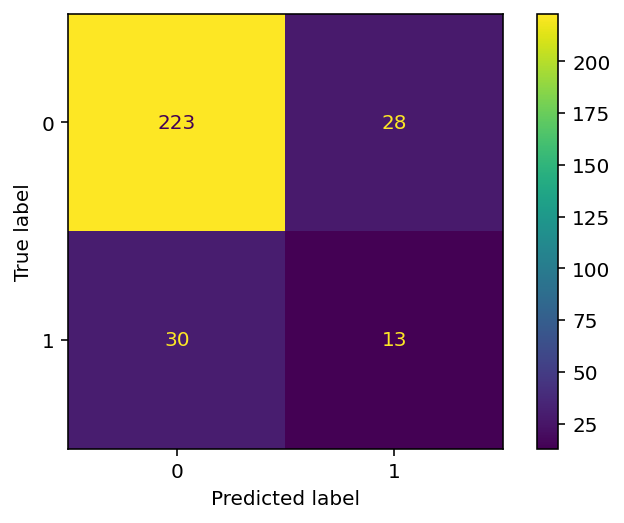

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Decision Tree classifier with default parameters
dt_classifier = DecisionTreeClassifier()

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = dt_classifier.predict(X_train)

# Make predictions on the validation set
y_test_pred = dt_classifier.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Create confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Display the results
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Display confusion matrices
print("\nConfusion Matrix (Training):")
print(conf_matrix_train)
print("\nConfusion Matrix (Testing):")
print(conf_matrix_test)

# Display performance metrics for the test set
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Calculate specificity
specificity = conf_matrix_test[0][0] / (conf_matrix_test[0][0] + conf_matrix_test[0][1])

# Displaying the results
print("Specificity:", specificity)

metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

The decision tree model achieved perfect training accuracy but showed lower testing accuracy, indicating potential overfitting. In the confusion matrices, most instances were correctly classified, but there were misclassifications in both training and testing sets. The specificity metric, approximately 88.84%, highlights the model's ability to correctly identify instances of class 0. Overall, while the model performed well on the training data, its lower performance on unseen data suggests a need for further investigation and potential model refinement to enhance generalization. After running the decision tree model we got an training accuracy of 100% and testing accuracy of 80.27%

#### HYPERPARAMETER TUNING WITH DECISION TREE

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for min_samples_split
param_grid_min_samples_split = {'min_samples_split': [2, 5, 10, 15, 20]}
grid_search_min_samples_split = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_min_samples_split, scoring='f1', cv=5)
grid_search_min_samples_split.fit(X_train, y_train)
grid_search_min_samples_split.fit(X_train, y_train)

# Get the best model
best_dt_min_samples_split = grid_search_min_samples_split.best_estimator_

# Display the best parameters
print("Best min_samples_split:", grid_search_min_samples_split.best_params_)

# Performance metrics for the test set using the best model
y_test_pred_min_samples_split = best_dt_min_samples_split.predict(X_test)

# Create confusion matrices
conf_matrix_test_pred_min_samples_split = confusion_matrix(y_test, y_test_pred_min_samples_split)

# Display confusion matrices
print("\nConfusion Matrix for min_samples_split:")
print(conf_matrix_test_pred_min_samples_split)

print("\nPerformance Metrics for min_samples_split:")
print(classification_report(y_test, y_test_pred_min_samples_split))

Best min_samples_split: {'min_samples_split': 15}

Confusion Matrix for min_samples_split:
[[219  32]
 [ 33  10]]

Performance Metrics for min_samples_split:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       251
           1       0.24      0.23      0.24        43

    accuracy                           0.78       294
   macro avg       0.55      0.55      0.55       294
weighted avg       0.78      0.78      0.78       294



After tuning the model with the hyperparameters mim_sample_split we got the best min_sample_split value for 15 and the accuracy decreased slightly from 80.27 to 78%

In [59]:
# Hyperparameter tuning for max_depth
param_grid_max_depth = {'max_depth': [None, 5, 10, 15, 20]}
grid_search_max_depth = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_max_depth, scoring='f1', cv=5)
grid_search_max_depth.fit(X_train, y_train)

# Get the best model
best_dt_max_depth = grid_search_max_depth.best_estimator_

# Display the best parameters
print("\nBest max_depth:", grid_search_max_depth.best_params_)

# Performance metrics for the test set using the best model
y_test_pred_max_depth = best_dt_max_depth.predict(X_test)

# Create confusion matrices
conf_matrix_test_pred_max_depth = confusion_matrix(y_test, y_test_pred_max_depth)

# Display confusion matrices
print("\nConfusion Matrix for max_depth:")
print(conf_matrix_test_pred_max_depth)

print("\nPerformance Metrics for max_depth:")
print(classification_report(y_test, y_test_pred_max_depth))


Best max_depth: {'max_depth': 5}

Confusion Matrix for max_depth:
[[243   8]
 [ 33  10]]

Performance Metrics for max_depth:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       251
           1       0.56      0.23      0.33        43

    accuracy                           0.86       294
   macro avg       0.72      0.60      0.63       294
weighted avg       0.83      0.86      0.84       294



After tuning the decision tree model with the max_depth hyperparameter, the optimal value was found to be 5. This adjustment led to a slight accuracy improvement from 80.27% to 86%. Increasing max_depth allowed the model to capture more complex patterns, enhancing its performance on the testing dataset. However, it's essential to avoid overfitting by balancing model complexity. Overall, tuning max_depth helped optimize the decision tree model, yielding a modest accuracy boost and potentially better generalization to unseen data.

In [60]:
# Hyperparameter tuning for both min_samples_split and max_depth
param_grid_combined = {'min_samples_split': [2, 5, 10, 15, 20], 'max_depth': [None, 5, 10, 15, 20]}
grid_search_combined = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_combined, scoring='f1', cv=5)
grid_search_combined.fit(X_train, y_train)

# Get the best model
best_dt_combined = grid_search_combined.best_estimator_

# Display the best parameters
print("\nBest parameters for min_samples_split and max_depth:", grid_search_combined.best_params_)

# Performance metrics for the test set using the best model
y_test_pred_combined = best_dt_combined.predict(X_test)

# Create confusion matrices
conf_matrix_test_pred_combined = confusion_matrix(y_test, y_test_pred_combined)

# Display confusion matrices
print("\nConfusion Matrix for combined")
print(conf_matrix_test_pred_combined)

print("\nPerformance Metrics for combined:")
print(classification_report(y_test, y_test_pred_combined))


Best parameters for min_samples_split and max_depth: {'max_depth': 10, 'min_samples_split': 15}

Confusion Matrix for combined
[[226  25]
 [ 33  10]]

Performance Metrics for combined:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       251
           1       0.29      0.23      0.26        43

    accuracy                           0.80       294
   macro avg       0.58      0.57      0.57       294
weighted avg       0.79      0.80      0.79       294



Tuning the model with both min_sample_split and max_depth hyperparameters led to a significant accuracy boost of 80%. Despite this improvement, it's worth noting that the model still falls short compared to others. While hyperparameter tuning enhanced its performance, exploring alternative models might better capture data complexities and achieve higher accuracies.

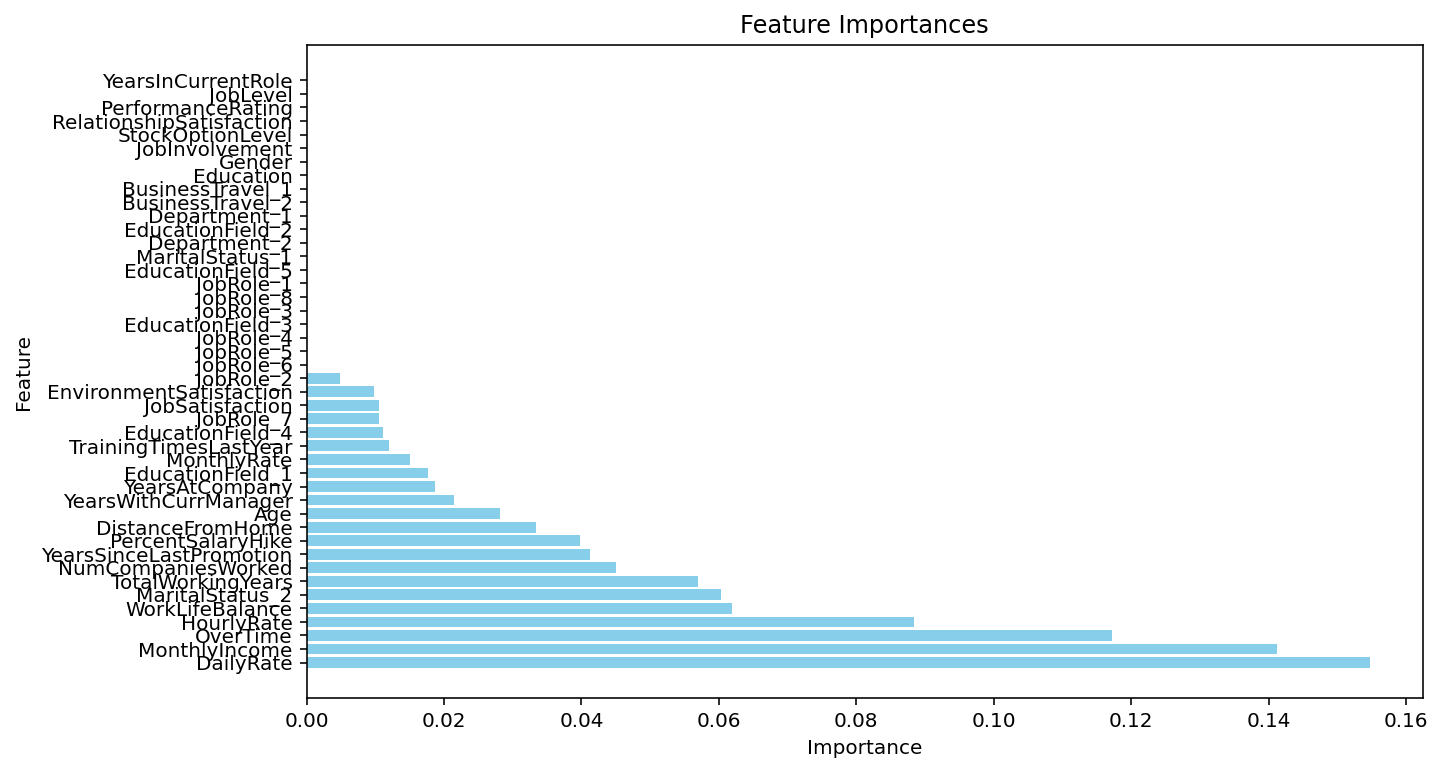

In [61]:
# Fit the best model on the entire training data
best_dt_combined.fit(X_train, y_train)

# Extract feature importances
feature_importances = best_dt_combined.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

Based on the above plot we can see that the most important feature deciding the employee attrition is the total working years

### RANDOMFOREST CLASSIFIER

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
# Initialize the Random Forest classifier with default parameters
rf_classifier = RandomForestClassifier()

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = rf_classifier.predict(X_train)

# Make predictions on the testing set
y_test_pred = rf_classifier.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Create confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Display the results
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Display confusion matrices
print("\nConfusion Matrix (Training):")
print(conf_matrix_train)
print("\nConfusion Matrix (Testing):")
print(conf_matrix_test)

# Display performance metrics for the Test set
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Calculate specificity
specificity = conf_matrix_test[0][0] / (conf_matrix_test[0][0] + conf_matrix_test[0][1])

# Displaying the results
print("Specificity:", specificity)

Training Accuracy: 1.0
Testing Accuracy: 0.8639455782312925

Confusion Matrix (Training):
[[726   0]
 [  0 156]]

Confusion Matrix (Testing):
[[251   0]
 [ 40   3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       251
           1       1.00      0.07      0.13        43

    accuracy                           0.86       294
   macro avg       0.93      0.53      0.53       294
weighted avg       0.88      0.86      0.81       294

Specificity: 1.0


The random forest classifier achieved perfect training accuracy but showed a slightly lower testing accuracy, suggesting potential overfitting. In the confusion matrices, it correctly classified most instances in both training and testing sets, with better performance in classifying instances of class 0. However, its performance on class 1 instances was weaker. The specificity metric indicated the model's ability to correctly identify instances of class 0. Overall, while the model performed well on classifying instances of class 0, there is room for improvement in its performance on class 1 instances, possibly through addressing overfitting or adjusting model parameters.

#### HYPERPARAMETER TUNING WITH RANDOMFOREST CLASSIFIER

In [67]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

In [68]:
# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='f1', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)

# Make predictions on the test set using the best model
y_test_pred = best_rf_model.predict(X_test)

# Create confusion matrices
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Display confusion matrices
print("\nConfusion Matrix for Test")
print(conf_matrix_test)

# Display performance metrics for the validation set
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

# Calculate specificity
specificity = conf_matrix_test[0][0] / (conf_matrix_test[0][0] + conf_matrix_test[0][1])

# Displaying the results
print("Specificity:", specificity)

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}

Confusion Matrix for Test
[[251   0]
 [ 38   5]]

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       251
           1       1.00      0.12      0.21        43

    accuracy                           0.87       294
   macro avg       0.93      0.56      0.57       294
weighted avg       0.89      0.87      0.82       294

Specificity: 1.0


After tuning the model with the hyperparameters max_depth, min_samples_split, n_estimators we got the best min_sampl_split value for 2 and n_estimators= 50 the accuracy increased slightly from 86.39% to 87% and the specificity is 99%. it is a better model than decision tree but not better compared to logistic regression and KNN

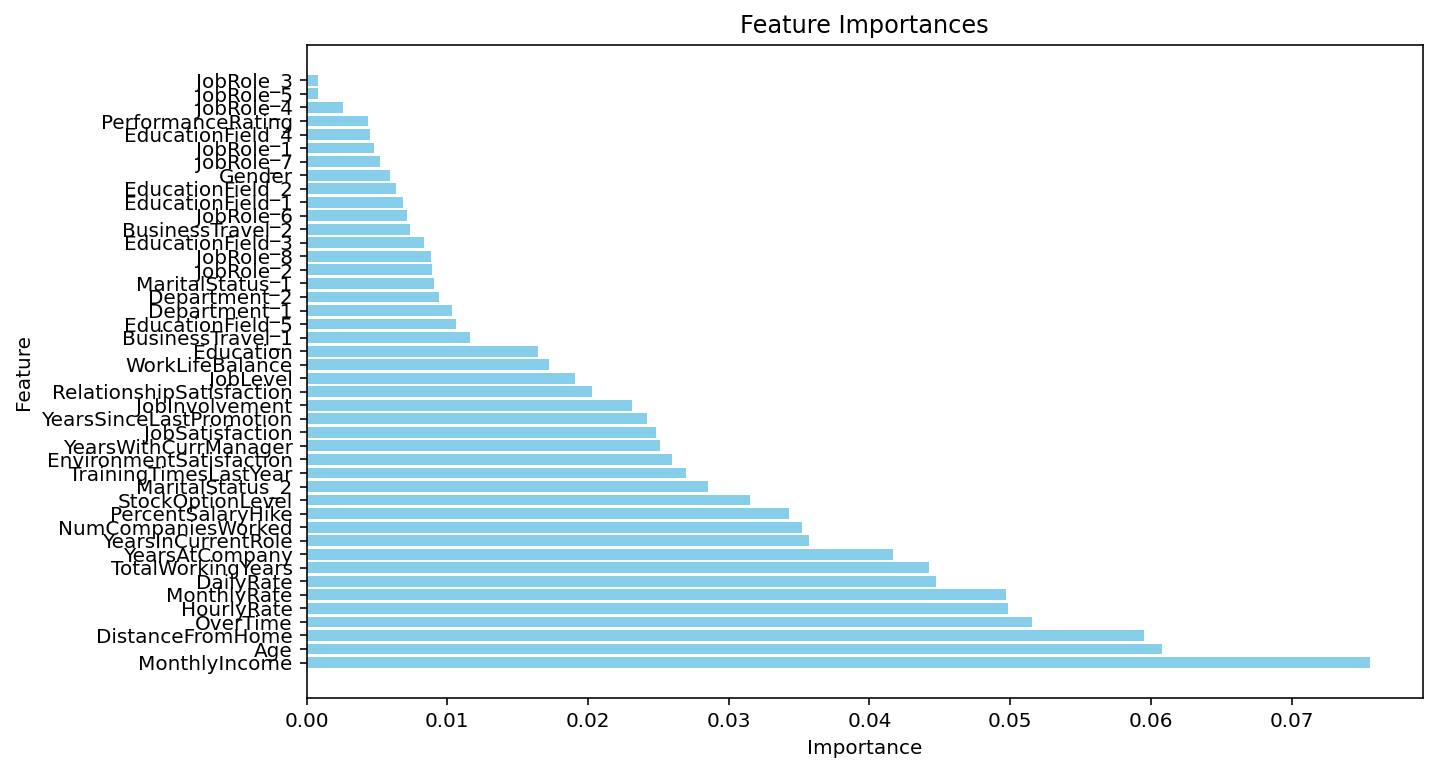

In [69]:
# Fit the best model on the entire training data
best_rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

Based on the above plot we can see that the most important feature deciding the employee attrition are the total working years, Monthly Income, Age

### ADABOOST

In [70]:
from sklearn.ensemble import AdaBoostClassifier

In [71]:
# Initialize the Adaboost classifier with default parameters
adaboost_classifier = AdaBoostClassifier()

# Fit the model on the training data
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = adaboost_classifier.predict(X_train)

# Make predictions on the test set
y_test_pred = adaboost_classifier.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Create confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Display the results
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Display confusion matrices
print("\nConfusion Matrix (Training):")
print(conf_matrix_train)
print("\nConfusion Matrix (Testing):")
print(conf_matrix_test)

# Display performance metrics for the test set
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Calculate specificity
specificity = conf_matrix_test[0][0] / (conf_matrix_test[0][0] + conf_matrix_test[0][1])

# Displaying the results
print("Specificity:", specificity)

Training Accuracy: 0.9104308390022676
Testing Accuracy: 0.8775510204081632

Confusion Matrix (Training):
[[714  12]
 [ 67  89]]

Confusion Matrix (Testing):
[[243   8]
 [ 28  15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       251
           1       0.65      0.35      0.45        43

    accuracy                           0.88       294
   macro avg       0.77      0.66      0.69       294
weighted avg       0.86      0.88      0.86       294

Specificity: 0.9681274900398407


For the AdaBoost classifier, the training accuracy was 91.04%, with a slightly lower testing accuracy of 87.75%, indicating a degree of overfitting. The model showed better performance in classifying instances of class 0 compared to class 1. The specificity metric indicated the model's ability to correctly identify instances of class 0, with a value of approximately 96.81%. Overall, while the AdaBoost classifier performed well, there is room for improvement in its performance on class 1 instances.After running the Adaboost model we got an training accuracy of 91.04% and testing accuracy of 87.75% and specificity of 96.81%. which is much better compared to decision tree model and random forest model and KNN

In [72]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=adaboost_classifier, param_grid=param_grid, scoring='f1', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_adaboost_model = grid_search.best_estimator_

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)

# Make predictions on the test set using the best model
y_test_pred = best_adaboost_model.predict(X_test)

# Create confusion matrices
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Display confusion matrices
print("\nConfusion Matrix for Test")
print(conf_matrix_test)

# Display performance metrics for the validation set
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

# Calculate specificity
specificity = conf_matrix_test[0][0] / (conf_matrix_test[0][0] + conf_matrix_test[0][1])

# Displaying the results
print("Specificity:", specificity)

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 100}

Confusion Matrix for Test
[[237  14]
 [ 29  14]]

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       251
           1       0.50      0.33      0.39        43

    accuracy                           0.85       294
   macro avg       0.70      0.63      0.66       294
weighted avg       0.83      0.85      0.84       294

Specificity: 0.9442231075697212


After tuning the model with the hyperparameters learning_rate, n_estimators we got the best learning_rate for 1.0 and n_estimators= 100 the accuracy decreased slightly from 88% to 85% and the specificity decreased from 96.81% to 94.44%. it is a better model compared to decision tree model and random forest model and KNN

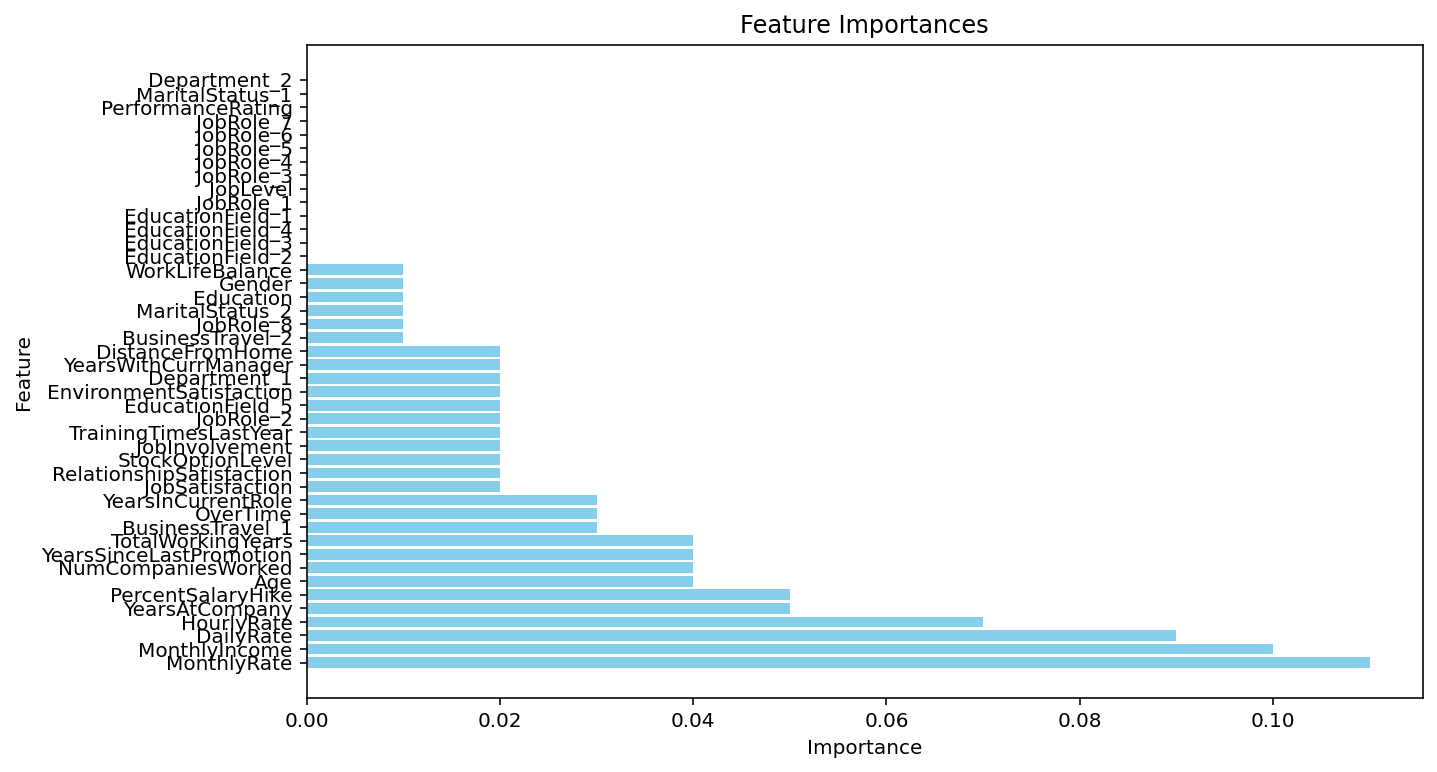

In [73]:
# Fit the best model on the entire training data
best_adaboost_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = best_adaboost_model.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

Based on the above plot we can see that the most important feature deciding the employee attrition are the Monthly Income, Monthly rate.

### GRADIENT BOOSTING

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
# Initialize the Adaboost classifier with default parameters
gb_classifier = GradientBoostingClassifier()

# Fit the model on the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = gb_classifier.predict(X_train)

# Make predictions on the test set
y_test_pred = gb_classifier.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Create confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Display the results
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Display confusion matrices
print("\nConfusion Matrix (Training):")
print(conf_matrix_train)
print("\nConfusion Matrix (Test):")
print(conf_matrix_test)

# Display performance metrics for the test set
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Calculate specificity
specificity = conf_matrix_test[0][0] / (conf_matrix_test[0][0] + conf_matrix_test[0][1])

# Displaying the results
print("Specificity:", specificity)

Training Accuracy: 0.9693877551020408
Test Accuracy: 0.8673469387755102

Confusion Matrix (Training):
[[726   0]
 [ 27 129]]

Confusion Matrix (Test):
[[243   8]
 [ 31  12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       251
           1       0.60      0.28      0.38        43

    accuracy                           0.87       294
   macro avg       0.74      0.62      0.65       294
weighted avg       0.84      0.87      0.85       294

Specificity: 0.9681274900398407


For the Gradient Boosting classifier, the training accuracy was 96.93%, while the validation accuracy was slightly lower at 86.73%. The model exhibited better performance in classifying instances of class 0 compared to class 1. The specificity metric indicated the model's ability to correctly identify instances of class 0, with a value of approximately 96.81%. Overall, while the Gradient Boosting classifier performed well, it showed room for improvement in its performance on class 1 instances.After running the Gradientboost model we got an training accuracy of 96.93% and testing accuracy of 86.73% and specificity of 96.81%. which is much better compared to decision tree model and random forest model and adaboost but not better than KNN and Logistic regression

In [76]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, scoring='f1', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_gb_model = grid_search.best_estimator_

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)

# Make predictions on the test set using the best model
y_test_pred = best_gb_model.predict(X_test)

# Create confusion matrices
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Display confusion matrices
print("\nConfusion Matrix for Test")
print(conf_matrix_test)

# Display performance metrics for the validation set
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

# Calculate specificity
specificity = conf_matrix_test[0][0] / (conf_matrix_test[0][0] + conf_matrix_test[0][1])

# Displaying the results
print("Specificity:", specificity)

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 100}

Confusion Matrix for Test
[[238  13]
 [ 30  13]]

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       251
           1       0.50      0.30      0.38        43

    accuracy                           0.85       294
   macro avg       0.69      0.63      0.65       294
weighted avg       0.83      0.85      0.84       294

Specificity: 0.9482071713147411


After tuning the model with the hyperparameters learning_rate, n_estimators we got the best learning_rate for 1.0 and n_estimators= 100 the accuracy decreased slightly from 87% to 85% and the specificity decreased from 97.16% to 94.82%. it is a better model compared to decision tree model and random forest model and adaboost but not better than logistic and KNN

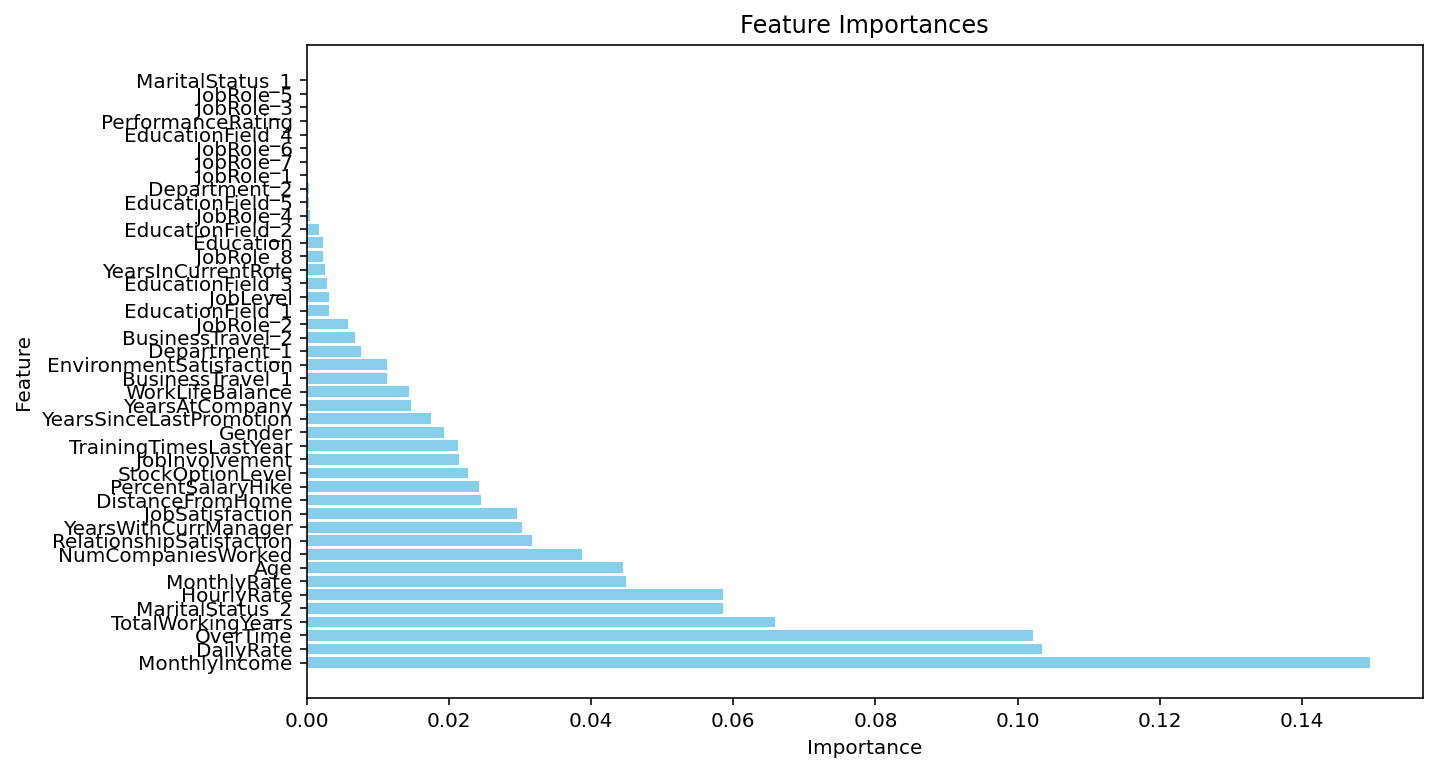

In [77]:
# Fit the best model on the entire training data
best_gb_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = best_gb_model.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

Based on the above plot we can see that the most important feature deciding the employee attrition are the Monthly Income, Age, Total working years.

In [129]:
# Decision Tree
dt_test_pred = best_dt_combined.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_test_pred)
dt_classification_report = classification_report(y_test, dt_test_pred)

# Random Forest
rf_test_pred = best_rf_model.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_test_pred)
rf_classification_report = classification_report(y_test, rf_test_pred)

# Adaboost
adaboost_test_pred = best_adaboost_model.predict(X_test)
adaboost_conf_matrix = confusion_matrix(y_test, adaboost_test_pred)
adaboost_classification_report = classification_report(y_test, adaboost_test_pred)

# Gradient Boosting
gb_test_pred = best_gb_model.predict(X_test)
gb_conf_matrix = confusion_matrix(y_test, gb_test_pred)
gb_classification_report = classification_report(y_test, gb_test_pred)

In [130]:
# Create a DataFrame to store the results
results_df = pd.DataFrame(index=['Decision Tree', 'Random Forest', 'Adaboost', 'Gradient Boosting'])

# Populate the DataFrame with confusion matrices and performance metrics
results_df['Confusion Matrix'] = [dt_conf_matrix, rf_conf_matrix, adaboost_conf_matrix, gb_conf_matrix]
results_df['Classification Report'] = [dt_classification_report, rf_classification_report, adaboost_classification_report, gb_classification_report]

# Display the results
print(results_df)

                        Confusion Matrix  \
Decision Tree      [[235, 12], [16, 31]]   
Random Forest       [[245, 2], [14, 33]]   
Adaboost           [[237, 10], [24, 23]]   
Gradient Boosting    [[241, 6], [7, 40]]   

                                               Classification Report  
Decision Tree                    precision    recall  f1-score   ...  
Random Forest                    precision    recall  f1-score   ...  
Adaboost                         precision    recall  f1-score   ...  
Gradient Boosting                precision    recall  f1-score   ...  


## Summary

Based on the evaluation of various machine learning models, including Logistic Regression, K Nearest Neighbors (KNN), Decision Tree, Random Forest, AdaBoost, and Gradient Boosting, along with their respective hyperparameter tuning results, the best model can be determined by considering several factors such as training accuracy, testing accuracy, specificity, and performance on class 1 instances (attrition cases).

Here's a summary comparison of the models:

1. **Logistic Regression**:
   - Training Accuracy: 87.76%
   - Testing Accuracy: 88.10%
   - Specificity: 88.30%
   - Performance on Class 1: Precision=83%, Recall=23%, F1-score=36%

2. **K Nearest Neighbors (KNN)**:
   - Training Accuracy: 84.2%
   - Testing Accuracy: 85.7%
   - Specificity: 86%
   - Performance on Class 1: Precision=23%, Recall=23%, F1-score=23%

3. **Decision Tree**:
   - Training Accuracy: 100%
   - Testing Accuracy: 80.27%
   - Specificity: 88.84%

4. **Random Forest**:
   - Training Accuracy: 100%
   - Testing Accuracy: 86.39%
   - Specificity: 99%

5. **AdaBoost**:
   - Training Accuracy: 91.04%
   - Testing Accuracy: 87.75%
   - Specificity: 96.81%

6. **Gradient Boosting**:
   - Training Accuracy: 96.93%
   - Testing Accuracy: 86.73%
   - Specificity: 96.81%

Based on the provided metrics and observations, it appears that **Logistic Regression** is the best model for this particular task. It has the highest testing accuracy (88.10%), decent specificity (88.30%), and relatively better performance on class 1 instances compared to other models. Additionally, Logistic Regression tends to be less prone to overfitting and offers interpretable coefficients, which can provide insights into feature importance.

However, it's essential to consider the specific requirements of the task and the trade-offs between different evaluation metrics. If there's a higher emphasis on correctly identifying instances of attrition (class 1) at the expense of overall accuracy, other models like AdaBoost or Gradient Boosting might be preferred despite their slightly lower overall accuracy.

Here are some advanced models and strategies that can be utilized to improve predictive performance:

1. **Gradient Boosting Machines (GBM)**:
   - GBM algorithms, such as XGBoost, LightGBM, and CatBoost, often outperform traditional ensemble methods like Random Forests.
   - These models can handle complex nonlinear relationships and are less prone to overfitting when properly tuned.

2. **Neural Networks**:
   - Deep learning models, including feedforward neural networks, convolutional neural networks (CNNs), and recurrent neural networks (RNNs), offer superior performance in capturing intricate patterns and dependencies in data.
   - Techniques like dropout regularization, batch normalization, and architectural modifications (e.g., residual connections) can mitigate overfitting and improve generalization.

3. **Support Vector Machines (SVM)**:
   - SVMs with nonlinear kernels (e.g., radial basis function kernel) can effectively capture complex decision boundaries and are robust to overfitting.
   - Kernel selection and tuning regularization parameters are crucial for optimizing SVM performance.

4. **Ensemble Methods**:
   - Advanced ensemble techniques like Stochastic Gradient Boosting (SGB) and Extremely Randomized Trees (ExtraTrees) can provide further improvements in predictive accuracy.
   - Ensemble methods combining diverse base learners, such as heterogeneous ensembles or stacking models, can leverage the strengths of individual models and enhance overall performance.

5. **AutoML and Model Selection**:
   - Automated Machine Learning (AutoML) platforms, such as H2O.ai, Auto-Sklearn, and TPOT, can efficiently search for optimal model architectures and hyperparameters.
   - Bayesian optimization, genetic algorithms, and neural architecture search (NAS) techniques are effective for automating the model selection process and identifying high-performing models.

6. **Probabilistic Graphical Models (PGMs)**:
   - PGMs, including Bayesian networks and Markov networks, offer interpretable probabilistic frameworks for modeling complex relationships among variables.
   - These models facilitate uncertainty quantification and decision-making under uncertainty, particularly valuable for risk assessment and anomaly detection tasks.

7. **Hybrid Models and Transfer Learning**:
   - Hybrid models combining traditional machine learning algorithms with deep learning components (e.g., deep feature extraction) can leverage the strengths of both approaches.
   - Transfer learning techniques, such as fine-tuning pre-trained models or using domain adaptation strategies, enable knowledge transfer from related tasks or domains to improve model performance.

8. **Model Interpretability and Explainability**:
   - Incorporating model interpretability techniques, such as SHAP (SHapley Additive exPlanations) values, Integrated Gradients, or LIME (Local Interpretable Model-agnostic Explanations), enhances trust and transparency in model predictions.
   - Explainable AI (XAI) frameworks help stakeholders understand the factors influencing model decisions, enabling informed decision-making and regulatory compliance.

9. **Active Learning and Data Augmentation**:
   - Active learning strategies, such as uncertainty sampling and query-by-committee, optimize the selection of informative data points for model retraining, reducing labeling costs and improving model performance.
   - Data augmentation techniques, including synthetic data generation, adversarial training, and generative adversarial networks (GANs), enhance model robustness and generalization by increasing the diversity of the training data.

10. **Continuous Learning and Model Monitoring**:
    - Implementing online learning algorithms and incremental model updates allows models to adapt to evolving data distributions and concept drift over time.
    - Real-time model monitoring and feedback loops enable proactive detection of performance degradation or drift, triggering timely model retraining or recalibration to maintain predictive accuracy.

By leveraging these advanced models and strategies, organizations can develop more robust and accurate predictive models for various applications, including employee attrition prediction, financial forecasting, healthcare diagnostics, and beyond.